In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

import healpy as hp
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db


In [2]:
plt.rc('legend', fontsize=20) # using a size in points
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rcParams['axes.labelsize'] = 16

In [3]:
# load opsim database
dbpath = "/home/idies/workspace/lsst_cadence/FBS_1.5/"  # path to all opsim databases

# output directory
outDir = '/home/idies/workspace/Temporary/lixl/scratch/outDir'
resultsDb = db.ResultsDb(outDir=outDir)


In [4]:
# get the name of all opsim dbs 
import glob

workpath = os.getcwd()
#workpath = '/home/idies/workspace/Storage/lixl/persistent/LSST_OpSim/unknowns'

os.chdir(dbpath)  # change to opsim database directory
dblist_all = glob.glob('*.db') 
os.chdir(workpath) # change back to work directory
dblist_all.sort()


In [5]:
dblist_all[5]

'baseline_v1.5_10yrs.db'

In [6]:
dblist_all

['agnddf_v1.5_10yrs.db',
 'alt_dust_v1.5_10yrs.db',
 'alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db',
 'baseline_2snaps_v1.5_10yrs.db',
 'baseline_samefilt_v1.5_10yrs.db',
 'baseline_v1.5_10yrs.db',
 'bulges_bs_v1.5_10yrs.db',
 'bulges_bulge_wfd_v1.5_10yrs.db',
 'bulges_cadence_bs_v1.5_10yrs.db',
 'bulges_cadence_bulge_wfd_v1.5_10yrs.db',
 'bulges_cadence_i_heavy_v1.5_10yrs.db',
 'bulges_i_heavy_v1.5_10yrs.db',
 'daily_ddf_v1.5_10yrs.db',
 'dcr_nham1_ug_v1.5_10yrs.db',
 'dcr_nham1_ugr_v1.5_10yrs.db',
 'dcr_nham1_ugri_v1.5_10yrs.db',
 'dcr_nham2_ug_v1.5_10yrs.db',
 'dcr_nham2_ugr_v1.5_10yrs.db',
 'dcr_nham2_ugri_v1.5_10yrs.db',
 'descddf_v1.5_10yrs.db',
 'filterdist_indx1_v1.5_10yrs.db',
 'filterdist_indx2_v1.5_10yrs.db',
 'filterdist_indx3_v1.5_10yrs.db',
 'filterdist_indx4_v1.5_10yrs.db',
 'filterdist_indx5_v1.5_10yrs.db',
 'filterdist_indx6_v1.5_10yrs.db',
 'filterdist_indx7_v1.5_10yrs.db',
 'filterdist_indx8_v1.5_10yrs.db',
 'footprint_add_mag_cloudsv1.5_10yrs.db',
 'footprint_big_sky_d

In [15]:
# check proposal information
propdic = {}
for dbname in dblist_all:
    #dbname=dblist_all[4]
    #dbname="pair_strategy_0_v1.5_10yrs.db"
    #dbname = "sat_dodge_v1.4_10yrs.db"
    opsdb = db.OpsimDatabase(dbpath+dbname)
    
    propInfo = opsdb.fetchPropInfo()[0]
    print(dbname, )
    propdic[dbname] = propInfo

agnddf_v1.5_10yrs.db
alt_dust_v1.5_10yrs.db
alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db
baseline_2snaps_v1.5_10yrs.db
baseline_samefilt_v1.5_10yrs.db
baseline_v1.5_10yrs.db
bulges_bs_v1.5_10yrs.db
bulges_bulge_wfd_v1.5_10yrs.db
bulges_cadence_bs_v1.5_10yrs.db
bulges_cadence_bulge_wfd_v1.5_10yrs.db
bulges_cadence_i_heavy_v1.5_10yrs.db
bulges_i_heavy_v1.5_10yrs.db
daily_ddf_v1.5_10yrs.db
dcr_nham1_ug_v1.5_10yrs.db
dcr_nham1_ugr_v1.5_10yrs.db
dcr_nham1_ugri_v1.5_10yrs.db
dcr_nham2_ug_v1.5_10yrs.db
dcr_nham2_ugr_v1.5_10yrs.db
dcr_nham2_ugri_v1.5_10yrs.db
descddf_v1.5_10yrs.db
filterdist_indx1_v1.5_10yrs.db
filterdist_indx2_v1.5_10yrs.db
filterdist_indx3_v1.5_10yrs.db
filterdist_indx4_v1.5_10yrs.db
filterdist_indx5_v1.5_10yrs.db
filterdist_indx6_v1.5_10yrs.db
filterdist_indx7_v1.5_10yrs.db
filterdist_indx8_v1.5_10yrs.db
footprint_add_mag_cloudsv1.5_10yrs.db
footprint_big_sky_dustv1.5_10yrs.db
footprint_big_sky_nouiyv1.5_10yrs.db
footprint_big_skyv1.5_10yrs.db
No proposal table available - no 

In [17]:
prop_df = pd.DataFrame(propdic).T
prop_df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11
agnddf_v1.5_10yrs.db,Other,WFD,DD: EDFS,DD:COSMOS,DD:EDFS,DD:XMM-LSS,DD:ECDFS,DD:ELAISS1,NaN,NaN,NaN,NaN
alt_dust_v1.5_10yrs.db,Other,WFD,DD:XMM-LSS,DD:ELAISS1,DD:EDFS,DD:ECDFS,DD:COSMOS,NaN,NaN,NaN,NaN,NaN


In [18]:
prop_df [ prop_df[1]!='WFD' ]

,0,1,2,3,4,5,6,7,8,9,10,11
footprint_big_wfdv1.5_10yrs.db,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#prop_df.iloc[:40]

#prop_df.iloc[40:]

In [7]:
def RADec2pix(nside, ra, dec, degree=True):
    """
    Calculate the nearest healpixel ID of an RA/Dec array, assuming nside.

    Parameters
    ----------
    nside : int
        The nside value of the healpix grid.
    ra : numpy.ndarray
        The RA values to be converted to healpix ids, in degree by default.
    dec : numpy.ndarray
        The Dec values to be converted to healpix ids, in degree by default.

    Returns
    -------
    numpy.ndarray
        The healpix ids.
    """
    if degree:
        ra = np.radians(ra) # change to radians
        dec = np.radians(dec)
    
    lat = np.pi/2. - dec
    hpid = hp.ang2pix(nside, lat, ra )
    return hpid


In [8]:
from lsst.sims.maf.utils import m52snr

class filterPairTGapsMetric(metrics.BaseMetric):
    """
    returns
    N_v * np.exp(-Dkl) for each fields
    
    Parameters:
        colname: 
        fltpair: filter pair, eg ['r', 'i']
        snr_lim: list, signal to noise ratio (fiveSigmaDepth) threshold for fltpair, default [5, 5]
        filename: output a csv table for time gaps of each field
    
    """

    def __init__(self, colname=['observationStartMJD', 'filter', 'fiveSigmaDepth'], fltpair=['r', 'i'], tmin=0, tmax=1.5/24, bins=50, mag_lim=[18, 18],
                 save_dT=False, filename=None, dataout=True, **kwargs):
        self.colname = colname
        self.filename = filename
        self.fltpair = fltpair
        self.mag_lim = mag_lim
        self.dataout = dataout
        self.tmin = tmin
        self.tmax = tmax
        self.bins = bins
        self.save_dT = save_dT
        
        self.Nrun = 0   # record the how many time run run()
        if filename!=None:
            if os.path.isfile(filename):
                # rm old file
                os.system("rm {}".format(filename))
                
        if self.dataout:
            super().__init__(col=self.colname, metricDtype='object', **kwargs)
        else:
            super().__init__(col=self.colname, metricDtype='float', **kwargs)
    
    def save_to_file(self, dic, filename="test_pkl.pkl"):
        '''save dict item to pickle file'''
        
        #df = self.load_from_pkl(filename)

        #df = df.append(pd.DataFrame(dic), ignore_index=True)

        #df.to_pickle(filename)
        df = pd.DataFrame(dic)
        with open(filename, 'a') as f:
            df.to_csv(f, header=f.tell()==0, index=None)
    
    def get_Dkl_i(self, values):
        '''kl divergence for histogram'''
        if values.any():
            values = values + 0.00001  # make each element non-zero
            prob = (values) / values.sum()  
        
            prob_uni = np.ones( len(prob) ) / len(prob)
            return np.sum( prob_uni * np.log(prob_uni / prob) )
        
        else:
            return np.NaN
        
    def get_FoM_i(self, dT_all, tmin=0, tmax=1.5/24, bins=50):
        """return FoM from array of metricValues"""
                
        dT_tlim = dT_all[(dT_all>tmin)&(dT_all<tmax)] 
        Nv = len(dT_tlim)
    
        values, bins_ = np.histogram(dT_tlim, bins=bins);
    
        Dkl = self.get_Dkl_i(values)
    
        FoM_i = Nv * np.exp(-Dkl)
        
        #print(self.Nrun, len(dT_all), Nv, Dkl, FoM_i)
        return Nv, Dkl, FoM_i, dT_tlim
      
    def run(self, dataSlice, slicePoint=None):
        
        # return all possible time gaps for each fields
        
        f0 = self.fltpair[0]
        f1 = self.fltpair[1]
        
        #check input config
        #print(f0, f1, self.tmin, self.tmax, self.mag_lim)
            
        # sort dataSlice
        
        idx0 = ( dataSlice['filter'] == f0 ) & ( dataSlice['fiveSigmaDepth'] > self.mag_lim[0])
        idx1 = ( dataSlice['filter'] == f1 ) & ( dataSlice['fiveSigmaDepth'] > self.mag_lim[1])
        
        timeCol0 = dataSlice['observationStartMJD'][idx0]
        timeCol1 = dataSlice['observationStartMJD'][idx1]

        timeCol0 = timeCol0.reshape((len(timeCol0), 1))
        timeCol1 = timeCol1.reshape((len(timeCol1), 1))
        
        # calculate time gaps matrix
        diffmat = np.abs( np.subtract(timeCol0, timeCol1.T) ) 
        
        # collect all time gaps
        if f0==f1:
            # get only triangle part
            dt_tri = np.tril(diffmat, -1)
            dT = dt_tri[dt_tri!=0]    # flatten lower triangle 
        else:
            dT = diffmat.flatten()

        Nv, Dkl, FoM_i, dT_tlim = self.get_FoM_i(dT, tmin=self.tmin, tmax=self.tmax, bins=self.bins)
        
        # print(self.Nrun, np.min(dataSlice['fiveSigmaDepth'][idx0]), np.min(dataSlice['fiveSigmaDepth'][idx1]),)
        self.Nrun += 1
        # write results to csv file
        fieldRA = np.mean(dataSlice['fieldRA']) ,
        fieldDec = np.mean(dataSlice['fieldDec']),
        
        if self.save_dT:
            dic = {'Nrun': self.Nrun, 
                'pixId': RADec2pix(nside=16, ra=fieldRA, dec=fieldDec)[0],
                'Nv': Nv,
                'Dkl': Dkl,
                'FoM_i': FoM_i,
                'dT_lim': dT_tlim
                  }
        else:
            dic = {'Nrun': self.Nrun, 
                'pixId': RADec2pix(nside=16, ra=fieldRA, dec=fieldDec)[0],
                'Nv': Nv,
                'Dkl': Dkl,
                'FoM_i': FoM_i,
                # 'dT_lim': dT_tlim
                  }
            
        if self.filename!=None:
            self.save_to_file(dic, filename=self.filename)
        
        if self.dataout:
            # return dT
            result = dic
            return result
        else:
        #    f0 = self.fltpair[0]
        #    f1 = self.fltpair[1]
            result = np.min(dT) if len(dT)!=0 else np.inf
            return float(result) 


In [9]:
def runMetric(dbname, fltpair, ipix_ms=None, nside=16, sqlstr=None,
              colname=['observationStartMJD', 'filter', 'fiveSigmaDepth'],
              tmin=0, tmax=1.5/24, bins=50, mag_lim=[18, 18],
              filename=None, dataout=True, **kwargs
             ):
    """run filterPairTGapsMetric
    dbname: name of opsim database
    fltpair: filter pair, eg: 'ri'
    ipix_ms: pixIds of footprint
    """
    opsdb = db.OpsimDatabase(dbpath+dbname)
    
    #fltpair = ['r', 'i']
    
    if ipix_ms!=None:
        # use UserPointsSlicer for minisurvey
        ra, dec = pix2radec(nside=nside, ipix=ipix_ms)
        slicer = slicers.UserPointsSlicer(ra, dec, latLonDeg=True, badval=0)
    else:
        # use HealpixSlicer 
        slicer = slicers.HealpixSlicer(nside=nside)
    
    # metric, slicer, constraint
    metric = filterPairTGapsMetric( colname=colname, fltpair=fltpair, tmin=tmin, tmax=tmax, bins=bins, mag_lim=mag_lim,
                 filename=filename, dataout=dataout, **kwargs)
    
    sqlconstraint = 'filter in ("{}", "{}")'.format(*fltpair)
    if sqlstr!=None:
        sqlconstraint += ' and {}'.format(sqlstr)
        
    # bundle
    newMetricSky = metricBundles.MetricBundle(metric, slicer, sqlconstraint)
    
    # group bundle
    bundleDict = {'newMetricSky':newMetricSky}
    group = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir = outDir, resultsDb=resultsDb)
    
    # run
    group.runAll()
    #group.plotAll(closefigs = False)
    return newMetricSky


In [82]:
# run for baseline
metricSky = runMetric( dbname=dblist_all[4], fltpair=['u', 'r'], ipix_ms=None, nside=16, sqlstr='proposalId=1',
              colname=['observationStartMJD', 'filter', 'fiveSigmaDepth'],
              tmin=0, tmax=1.5/24, bins=50, mag_lim=[18, 18],
              filename=None, dataout=True, save_dT=True)


Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") and proposalId=1 for columns ['fieldRA', 'filter', 'fiveSigmaDepth', 'fieldDec', 'observationStartMJD']
Found 482319 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [83]:
arr = metricSky.metricValues.data
arr_valid = arr[ arr != None ]
df = pd.DataFrame.from_records(arr_valid)
df.head(3)

,Dkl,FoM_i,Nrun,Nv,dT_lim,pixId
0,7.755538,0.005140,1,12,"[0.016146125948580448, 0.016141299063747283, 0...",1376
1,8.942927,0.001699,2,13,"[0.016230229804932605, 0.016462671774206683, 0...",1377
2,9.097778,0.001679,3,15,"[0.016320085211191326, 0.016341726717655547, 0...",1378


In [33]:
tmin = 5/60/60/24 # in days
tmax = 1.5/24 
bins = np.linspace(tmin, tmax, 50)
get_FoM_tgaps(df=df, tmin=tmin, tmax=tmax, bins=bins)


14165.567066309595

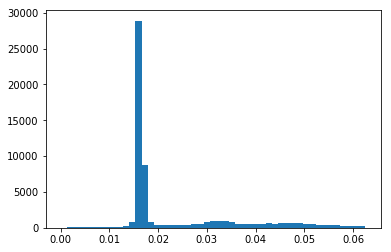

In [35]:
plt.hist(np.concatenate(df.dT_lim), bins=bins);

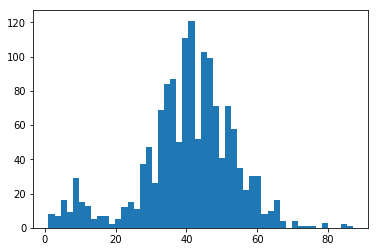

In [37]:
plt.hist(df.Nv[df.Nv>0], bins=50);

In [13]:
fltpairs = ['uu', 'ug', 'ur', 'ui', 'uz', 'uy', 'gg', 'gr', 'gi', 'gz', 'gy',
           'rr', 'ri', 'rz', 'ry', 'ii', 'iz', 'iy', 'zz', 'zy', 'yy' ]

In [24]:
dblist_all[5:6]

['baseline_v1.5_10yrs.db']

### run all filter pairs for baseline

In [10]:
def get_Dkl(values):
    '''kl divergence for histogram'''
    if values.any():
        values = values + 0.00001  # make each element non-zero
        prob = (values) / values.sum()  
    
        prob_uni = np.ones( len(prob) ) / len(prob)
        return np.sum( prob_uni * np.log(prob_uni / prob) )
    
    else:
        return np.NaN

def get_FoM_tgaps(df, tmin=0, tmax=1.5/24, bins=50):
    """return FoM from array of metricValues
    Inputs:
     df: pd.DataFrame, cols ['pixId', 'Dkl', 'FoM_i', 'Nv', 'dT_lim']
    """
    
    dT_all = np.concatenate(df.dT_lim.values)
    
    dT_tlim = dT_all[(dT_all>tmin)&(dT_all<tmax)] 
    Nv = len(dT_tlim)

    values, bins_ = np.histogram(dT_tlim, bins=bins);

    Dkl = get_Dkl(values)

    FoM = Nv * np.exp(-Dkl)
    
    return FoM


In [14]:
%%time 
# run all filter pairs for baseline 

dicFoM = {}
dicFoM['db'] = dblist_all[5:6]

nside = 16
# select mini survey footprint 
ipix_ms = None
#sqlstr = "night<4000 and proposalId=1"
sqlstr = None
magdic = {'u':18, 'g':18, 'r':18, 'i':18, 'z':18, 'y':18}

dataRaw = {}  # save the raw metricValues.data for each opsim each fltpair; dataRaw[fltpair][dbname]

for fltpair in fltpairs: 
    dicFoM[fltpair] = []
    dataRaw[fltpair] = {}
    for dbname in dicFoM['db']: 
        if fltpair[0]==fltpair[1]:
            tmin = 5/60/60/24 # in days
            tmax = 3e8/60./60./24    
            # histogram in log space
            bins=np.logspace(np.log10(tmin), np.log10(tmax), 50)
            
        else:
            tmin = 5/60/60/24
            tmax = 1.5/24 # 1.5 hour in days
            bins = np.linspace(tmin, tmax, 50)
            
        metricSky = runMetric(dbname, fltpair=fltpair, sqlstr=sqlstr, nside=nside, ipix_ms=ipix_ms, 
                                 mag_lim=[magdic[fltpair[0]], magdic[fltpair[1]]],
                                 tmin=tmin, tmax=tmax, bins=bins,
                                 filename=None, save_dT=True, dataout=True );
            
        arr = metricSky.metricValues.data 
        df = pd.DataFrame.from_records( arr[ arr != None ] )
        
        FoM_tgaps = get_FoM_tgaps(df=df, tmin=tmin, tmax=tmax, bins=bins)

        dicFoM[fltpair].append(FoM_tgaps)
        
        dataRaw[fltpair][dbname] = pd.DataFrame.from_records( arr[ arr != None ] )[['pixId', 'Dkl', 'FoM_i', 'Nv']]  
        
        print('>>>', fltpair, dbname, FoM_tgaps)
        
    df_fom = pd.DataFrame(dicFoM)
    df_fom.to_csv('tgaps_FoM_{}_allsky.csv'.format(dbname), index=False)
    # save raw data to pickle
    pd.DataFrame( dataRaw ).to_pickle(outDir+'/tgaps_dataRaw_baseline_v1.5_allsky.pkl',)


Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 141843 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uu baseline_v1.5_10yrs.db 18572.277450824826
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 365714 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ug baseline_v1.5_10yrs.db 20610.844875791932
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") for colum

Found 870863 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zy baseline_v1.5_10yrs.db 129921.32617390966
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 437741 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> yy baseline_v1.5_10yrs.db 141076.0564455293
CPU times: user 5min 24s, sys: 1min 23s, total: 6min 48s
Wall time: 7min 52s


In [15]:
# get the median of N visits for each filter pair
Nvth = {}
for fltpair in fltpairs: 
    df = dataRaw[fltpair]['baseline_v1.5_10yrs.db']
    Nvth[fltpair] = np.median( df.Nv ) 


In [16]:
Nvth

{'uu': 1711.0,
 'ug': 45.0,
 'ur': 42.0,
 'ui': 5.0,
 'uz': 0.0,
 'uy': 0.0,
 'gg': 3570.0,
 'gr': 83.0,
 'gi': 14.0,
 'gz': 0.0,
 'gy': 0.0,
 'rr': 20301.0,
 'ri': 115.0,
 'rz': 7.0,
 'ry': 0.0,
 'ii': 20608.5,
 'iz': 135.0,
 'iy': 20.5,
 'zz': 16471.0,
 'zy': 108.0,
 'yy': 18475.5}

In [17]:
Nvth

{'uu': 1711.0,
 'ug': 45.0,
 'ur': 42.0,
 'ui': 5.0,
 'uz': 0.0,
 'uy': 0.0,
 'gg': 3570.0,
 'gr': 83.0,
 'gi': 14.0,
 'gz': 0.0,
 'gy': 0.0,
 'rr': 20301.0,
 'ri': 115.0,
 'rz': 7.0,
 'ry': 0.0,
 'ii': 20608.5,
 'iz': 135.0,
 'iy': 20.5,
 'zz': 16471.0,
 'zy': 108.0,
 'yy': 18475.5}

In [19]:
starDens = np.load('starDens16.npz')['starDens']
"""
# for proposal=1
Nvth = {'uu': 1770.0,
 'ug': 50.0,
 'ur': 47.0,
 'ui': 6.0,
 'uz': 0.0,
 'uy': 0.0,
 'gg': 3828.0,
 'gr': 91.0,
 'gi': 17.0,
 'gz': 0.0,
 'gy': 0.0,
 'rr': 21384.0,
 'ri': 129.0,
 'rz': 9.0,
 'ry': 1.0,
 'ii': 21690.0,
 'iz': 149.0,
 'iy': 26.0,
 'zz': 17310.5,
 'zy': 123.0,
 'yy': 18998.0}
"""

"\n# for proposal=1\nNvth = {'uu': 1770.0,\n 'ug': 50.0,\n 'ur': 47.0,\n 'ui': 6.0,\n 'uz': 0.0,\n 'uy': 0.0,\n 'gg': 3828.0,\n 'gr': 91.0,\n 'gi': 17.0,\n 'gz': 0.0,\n 'gy': 0.0,\n 'rr': 21384.0,\n 'ri': 129.0,\n 'rz': 9.0,\n 'ry': 1.0,\n 'ii': 21690.0,\n 'iz': 149.0,\n 'iy': 26.0,\n 'zz': 17310.5,\n 'zy': 123.0,\n 'yy': 18998.0}\n"

### run all filter pairs for all opsims

In [20]:
%%time 

dicFoMtGaps = {}
dicNfields = {}
dicNstar = {}

dicFoM['db'] = dblist_all

nside = 16
# select mini survey footprint 
ipix_ms = None
#sqlstr = "night<4000 and proposalId=1"
sqlstr = None
magdic = {'u':18, 'g':18, 'r':18, 'i':18, 'z':18, 'y':18}

dataRaw = {}  # save the raw metricValues.data for each opsim each fltpair; dataRaw[fltpair][dbname]

for fltpair in fltpairs:     
    dicFoMtGaps[fltpair] = []
    dicNfields[fltpair] = []
    dicNstar[fltpair] = []
    
    dataRaw[fltpair] = {}
    for dbname in dicFoM['db']: 
        if fltpair[0]==fltpair[1]:
            tmin = 5/60/60/24 # in days
            tmax = 3e8/60./60./24    
            # histogram in log space
            bins=np.logspace(np.log10(tmin), np.log10(tmax), 50)
            
        else:
            tmin = 5/60/60/24
            tmax = 1.5/24 # 1.5 hour in days
            bins = np.linspace(tmin, tmax, 50)
            
        metricSky = runMetric(dbname, fltpair=fltpair, sqlstr=sqlstr, nside=nside, ipix_ms=ipix_ms, 
                                 mag_lim=[magdic[fltpair[0]], magdic[fltpair[1]]],
                                 tmin=tmin, tmax=tmax, bins=bins,
                                 filename=None, save_dT=True, dataout=True );
            
        arr = metricSky.metricValues.data 
        
        df = pd.DataFrame.from_records( arr[ arr != None ] )
        
        # count number of fields/stars above threshold 
        df['starDensity'] = starDens[ df['pixId'].values ] 
        idx = df['Nv'] > Nvth[fltpair]
        Nfields = df['Nv'][idx].shape[0]
        Nstar = np.sum( df['starDensity'][idx] )

        FoM_tgaps = get_FoM_tgaps(df=df, tmin=tmin, tmax=tmax, bins=bins)
                
        dicFoMtGaps[fltpair].append (FoM_tgaps)
        dicNfields[fltpair].append(Nfields)
        dicNstar[fltpair].append(Nstar)
        
        dataRaw[fltpair][dbname] = df[['pixId', 'Dkl', 'FoM_i', 'Nv']]  
        
        print('>>>', fltpair, dbname, FoM_tgaps, Nfields, Nstar)
    
    df_fom = pd.DataFrame(dicFoMtGaps)
    df_fom.to_csv('df_tgapsFoM_allsky_v1.5.csv', index=False)
    
    df_fom = pd.DataFrame(dicNfields)
    df_fom.to_csv('df_Nfields_allsky_v1.5.csv', index=False)
    
    df_fom = pd.DataFrame(dicNstar)
    df_fom.to_csv('df_Nstars_allsky_v1.5.csv', index=False)
    
    # save raw data to pickle
    pd.DataFrame( dataRaw ).to_pickle(outDir+'/tgaps_dataRaw_allsky_v1.5.pkl',)


Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 156714 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uu agnddf_v1.5_10yrs.db 40540.81920422848 896 64358964
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 143535 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uu alt_dust_v1.5_10yrs.db 24026.842724681785 324 13065804
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter 

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uu dcr_nham2_ugri_v1.5_10yrs.db 34033.79150357331 1117 69586704
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 136984 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uu descddf_v1.5_10yrs.db 16358.452325530201 767 56729376
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 347457 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uu filterdist_indx1_v1.5_10yr

Found 141552 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uu footprint_no_gp_northv1.5_10yrs.db 24753.30889225905 867 58219416
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 141688 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uu footprint_standard_goalsv1.5_10yrs.db 23748.581765124924 808 61287264
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 138645 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Runn

Found 189917 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uu short_exp_5ns_5expt_v1.5_10yrs.db 111881.54423166659 1391 109713168
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 142097 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uu spiders_v1.5_10yrs.db 18296.97858811929 810 60690132
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 141199 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary sta

Found 144181 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uu wfd_depth_scale0.75_v1.5_10yrs.db 25085.40639906493 541 222029784
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 144085 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uu wfd_depth_scale0.80_noddf_v1.5_10yrs.db 18027.553727795726 872 140501772
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 143504 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
R

Found 367435 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ug bulges_cadence_bs_v1.5_10yrs.db 18995.460111949156 799 35688096
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 367931 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ug bulges_cadence_bulge_wfd_v1.5_10yrs.db 19213.3641543556 766 37610676
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 366450 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running

Found 322418 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ug filterdist_indx8_v1.5_10yrs.db 9492.901266871326 1168 218529828
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 364287 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ug footprint_add_mag_cloudsv1.5_10yrs.db 20321.220897253814 950 103144248
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 363393 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Runni

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 378743 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ug roll_mod2_dust_sdf_0.20_v1.5_10yrs.db 22105.651499604024 1079 46788660
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 374001 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ug rolling_mod2_sdf_0.10_v1.5_10yrs.db 22732.68154612057 1225 133252992
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database Summar

Found 394690 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ug twilight_neo_mod1_v1.5_10yrs.db 27180.627787107456 1211 225210852
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 389201 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ug twilight_neo_mod2_v1.5_10yrs.db 26250.536040197283 1302 237317256
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 384665 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running 

Found 359636 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ug wfd_depth_scale0.95_v1.5_10yrs.db 19816.712025819274 979 66712644
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 349957 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ug wfd_depth_scale0.99_noddf_v1.5_10yrs.db 9985.884094314319 1196 76904676
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 350915 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Ru

Found 638919 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ur dcr_nham2_ug_v1.5_10yrs.db 44209.92972624002 574 35913240
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 641591 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ur dcr_nham2_ugr_v1.5_10yrs.db 45683.44770325599 199 13299624
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 639939 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statist

Found 649115 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ur footprint_newAv1.5_10yrs.db 49291.23113751476 419 58524048
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 648871 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ur footprint_newBv1.5_10yrs.db 50832.40827878351 532 46490508
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 633530 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statis

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 715436 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ur short_exp_2ns_5expt_v1.5_10yrs.db 68889.81083180988 1421 134986500
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 835736 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ur short_exp_5ns_1expt_v1.5_10yrs.db 77881.56625537373 1582 197325828
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllPr

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ur wfd_depth_scale0.70_noddf_v1.5_10yrs.db 17722.367313249466 881 127860408
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 646087 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ur wfd_depth_scale0.70_v1.5_10yrs.db 52282.67170512624 696 88306416
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 643360 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ur wfd

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "i") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 637685 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ui baseline_v1.5_10yrs.db 34242.82851333763 884 70083000
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "i") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 638410 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ui bulges_bs_v1.5_10yrs.db 31912.25870455267 587 24440184
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filte

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ui filterdist_indx4_v1.5_10yrs.db 4032.3532330784783 367 62371980
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "i") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 509645 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ui filterdist_indx5_v1.5_10yrs.db 5727.695837885744 871 100305900
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "i") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 786838 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ui filterdist_indx

Found 636310 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ui goodseeing_griz_v1.5_10yrs.db 32551.416673762225 731 59579100
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "i") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 636660 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ui goodseeing_gz_v1.5_10yrs.db 33880.24929913262 762 77449428
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "i") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 639451 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary sta

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "i") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 637009 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ui third_obs_pt45v1.5_10yrs.db 35023.20507175456 727 55338120
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "i") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 637866 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ui third_obs_pt60v1.5_10yrs.db 33332.285585528254 756 74265840
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constr

Found 641163 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ui wfd_depth_scale0.85_v1.5_10yrs.db 32832.36903448312 686 77642856
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "i") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 636560 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ui wfd_depth_scale0.90_noddf_v1.5_10yrs.db 6260.894304774502 893 65944692
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "i") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 637689 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Runn

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uz daily_ddf_v1.5_10yrs.db nan 0 0
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 574943 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uz dcr_nham1_ug_v1.5_10yrs.db nan 0 0
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 577187 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uz dcr_nham1_ugr_v1.5_10yrs.db nan 0 0
Healpix slicer using NSIDE=16, approxi

Found 579454 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uz footprint_big_wfdv1.5_10yrs.db nan 0 0
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 496784 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uz footprint_bluer_footprintv1.5_10yrs.db nan 0 0
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 573440 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uz footprin

Found 573153 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uz rolling_mod6_sdf_0.20_v1.5_10yrs.db nan 0 0
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 658728 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uz short_exp_2ns_1expt_v1.5_10yrs.db nan 0 0
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 649770 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uz short_ex

Found 596162 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uz wfd_depth_scale0.70_noddf_v1.5_10yrs.db nan 0 0
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 587451 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uz wfd_depth_scale0.70_v1.5_10yrs.db nan 0 0
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 593585 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uz wfd_

Found 580863 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uy bulges_bs_v1.5_10yrs.db 1790.370897330835 34 1172880
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 581439 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uy bulges_bulge_wfd_v1.5_10yrs.db 6910.123618241756 49 9661104
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 581192 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.

Found 542798 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uy filterdist_indx6_v1.5_10yrs.db 5.772937112660881 45 1066932
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 637551 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uy filterdist_indx7_v1.5_10yrs.db 0.08808432281286546 20 121500
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 633147 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary sta

Found 577449 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uy goodseeing_i_v1.5_10yrs.db 4816.883115478443 17 230076
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 581626 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uy greedy_footprint_v1.5_10yrs.db 7659.892321280114 9 65412
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 588815 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.


Found 582480 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uy third_obs_pt90v1.5_10yrs.db 2828.75074079582 18 258444
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 711316 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uy twilight_neo_mod1_v1.5_10yrs.db 14016.400102851174 50 1769832
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 653628 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statist

Found 584763 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uy wfd_depth_scale0.95_noddf_v1.5_10yrs.db 0.07730168905155926 30 769572
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 587840 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uy wfd_depth_scale0.95_v1.5_10yrs.db 7522.612647453506 26 158760
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 591961 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running 

Found 224585 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gg dcr_nham1_ugri_v1.5_10yrs.db 62133.20199856553 1015 67929192
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "g") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 225155 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gg dcr_nham2_ug_v1.5_10yrs.db 91634.39106726473 1021 66747168
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "g") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 225480 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary stat

Found 221626 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gg footprint_gp_smoothv1.5_10yrs.db 54331.03680318869 560 124151292
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "g") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 221636 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gg footprint_newAv1.5_10yrs.db 50833.07232276675 11 162288
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "g") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 223865 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary sta

Found 256420 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gg short_exp_2ns_1expt_v1.5_10yrs.db 227606.9647518243 1333 83346768
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "g") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 251920 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gg short_exp_2ns_5expt_v1.5_10yrs.db 180106.1653950603 1309 81128160
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "g") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 294419 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running 

Found 236857 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gg wfd_depth_scale0.70_noddf_v1.5_10yrs.db 34349.58181180904 656 115653708
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "g") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 237503 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gg wfd_depth_scale0.70_v1.5_10yrs.db 54871.557459463365 415 50471316
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "g") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 233271 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Ru

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "r") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 715547 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gr baseline_v1.5_10yrs.db 78725.00758442862 1001 64875888
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "r") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 717293 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gr bulges_bs_v1.5_10yrs.db 73220.67543922558 548 29226168
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filt

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gr filterdist_indx4_v1.5_10yrs.db 18558.401775585862 6 7451388
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "r") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 554147 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gr filterdist_indx5_v1.5_10yrs.db 23907.392474129785 671 130359492
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "r") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 630153 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gr filterdist_indx6_

Found 714856 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gr goodseeing_griz_v1.5_10yrs.db 74433.43687992923 951 62381808
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "r") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 715461 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gr goodseeing_gz_v1.5_10yrs.db 74322.88662356352 982 66069396
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "r") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 714447 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary stat

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "r") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 715794 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gr third_obs_pt45v1.5_10yrs.db 80689.49829333134 1003 70203672
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "r") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 717567 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gr third_obs_pt60v1.5_10yrs.db 84731.46664250016 1041 69670080
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with const

Found 720156 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gr wfd_depth_scale0.85_v1.5_10yrs.db 77203.73740814657 925 62494524
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "r") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 713762 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gr wfd_depth_scale0.90_noddf_v1.5_10yrs.db 30344.485841464524 1187 73662192
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "r") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 714666 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Ru

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "i") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 698307 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gi daily_ddf_v1.5_10yrs.db 34591.37839510286 671 54072864
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "i") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 719399 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gi dcr_nham1_ug_v1.5_10yrs.db 44248.04221902801 790 63334116
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint f

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gi footprint_big_sky_nouiyv1.5_10yrs.db 47219.27644522548 1092 30086568
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "i") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 728953 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gi footprint_big_skyv1.5_10yrs.db 49145.145514231 1070 30311748
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "i") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 706087 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gi footprint_b

Found 723550 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gi rolling_mod3_sdf_0.10_v1.5_10yrs.db 48849.73063145814 1068 69635952
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "i") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 724686 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gi rolling_mod3_sdf_0.20_v1.5_10yrs.db 49609.47597896031 1043 70415820
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "i") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 723630 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Runn

Found 693212 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gi u60_v1.5_10yrs.db 42521.1137889842 853 62082072
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "i") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 684839 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gi var_expt_v1.5_10yrs.db 52414.51721244596 1017 73032516
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "i") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 747711 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed

Found 663902 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gz alt_dust_v1.5_10yrs.db 26963.300149858078 1017 70521948
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 670055 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gz alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db 26528.08478701636 1086 59819544
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 607450 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running su

Found 742411 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gz filterdist_indx1_v1.5_10yrs.db 1141.7383490197221 853 166263660
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 647436 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gz filterdist_indx2_v1.5_10yrs.db 907.7380496042697 762 153657216
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 807879 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summa

Found 658521 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gz footprint_stuck_rollingv1.5_10yrs.db 26063.96425852728 708 42785280
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 655886 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gz goodseeing_gi_v1.5_10yrs.db 27646.787929897833 924 83254608
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 655487 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summ

Found 662972 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gz third_obs_pt120v1.5_10yrs.db 28794.91917553055 622 109252404
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 656993 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gz third_obs_pt15v1.5_10yrs.db 28180.750166580092 767 83619504
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 657048 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary sta

Found 668067 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gz wfd_depth_scale0.80_v1.5_10yrs.db 25998.709976228514 682 78764580
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 668538 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gz wfd_depth_scale0.85_noddf_v1.5_10yrs.db 1109.9296164418602 854 138452076
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 661594 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
R

Found 664135 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gy bulges_cadence_i_heavy_v1.5_10yrs.db 48428.09863439368 285 51509448
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 664182 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gy bulges_i_heavy_v1.5_10yrs.db 57409.67870869301 294 26713188
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 639197 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summ

Found 682078 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gy footprint_big_sky_dustv1.5_10yrs.db 52490.19877187226 383 17656236
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 672277 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gy footprint_big_sky_nouiyv1.5_10yrs.db 43091.97893162894 251 8636508
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 657074 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Runnin

Found 668801 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gy rolling_mod2_sdf_0.20_v1.5_10yrs.db 54301.632377086295 293 33808248
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 672208 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gy rolling_mod3_sdf_0.10_v1.5_10yrs.db 53104.524447108655 425 41429016
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 672343 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Runn

Found 705664 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gy twilight_neo_mod4_v1.5_10yrs.db 57410.62489773762 288 54125568
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 639450 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gy u60_v1.5_10yrs.db 45722.92438790166 301 35606124
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 625185 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.


Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "r") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 469008 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rr agnddf_v1.5_10yrs.db 98025.58943464041 943 60727752
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "r") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 487490 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rr alt_dust_v1.5_10yrs.db 181500.23036954392 224 10337112
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter 

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rr dcr_nham2_ugri_v1.5_10yrs.db 295492.7550349312 1006 63213696
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "r") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 473116 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rr descddf_v1.5_10yrs.db 100621.33501377517 866 57189528
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "r") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 367955 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rr filterdist_indx1_v1.5_10yr

Found 491978 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rr footprint_no_gp_northv1.5_10yrs.db 179544.01592966053 1059 59774868
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "r") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 491757 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rr footprint_standard_goalsv1.5_10yrs.db 177627.2688799379 987 62569476
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "r") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 491932 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Run

Found 621340 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rr short_exp_5ns_5expt_v1.5_10yrs.db 981273.4614177729 1347 84617784
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "r") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 492318 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rr spiders_v1.5_10yrs.db 130730.72174630406 968 63463500
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "r") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 495178 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary stat

Found 499848 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rr wfd_depth_scale0.75_v1.5_10yrs.db 171273.13441839517 158 5289552
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "r") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 496712 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rr wfd_depth_scale0.80_noddf_v1.5_10yrs.db 101352.5691999647 633 45797364
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "r") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 497108 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Runn

Found 987204 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ri bulges_cadence_bs_v1.5_10yrs.db 105289.14829778619 791 40650120
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 986890 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ri bulges_cadence_bulge_wfd_v1.5_10yrs.db 103758.75557561942 777 92070648
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 993049 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Runni

Found 923059 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ri filterdist_indx8_v1.5_10yrs.db 38347.34603622377 1370 258852168
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 987603 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ri footprint_add_mag_cloudsv1.5_10yrs.db 108392.28538977169 1006 67788144
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 969234 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Runni

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 975584 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ri roll_mod2_dust_sdf_0.20_v1.5_10yrs.db 106957.82620080604 885 35177688
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 983698 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ri rolling_mod2_sdf_0.10_v1.5_10yrs.db 109896.82404635027 1068 69966036
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database Summary

Found 1529284 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ri twilight_neo_mod1_v1.5_10yrs.db 130258.28504764389 584 47992752
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 1252715 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ri twilight_neo_mod2_v1.5_10yrs.db 122906.79195466264 888 63778680
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 1162728 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running s

Found 985134 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ri wfd_depth_scale0.95_v1.5_10yrs.db 112564.61897614521 1182 72935820
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 981962 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ri wfd_depth_scale0.99_noddf_v1.5_10yrs.db 42989.96911160057 1334 83098044
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 983592 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
R

Found 917689 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rz dcr_nham2_ug_v1.5_10yrs.db 91420.93988201136 980 73241496
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 922132 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rz dcr_nham2_ugr_v1.5_10yrs.db 82461.72341653988 875 78735384
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 918875 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statist

Found 903844 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rz footprint_newAv1.5_10yrs.db 87871.54351528069 963 143265492
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 901847 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rz footprint_newBv1.5_10yrs.db 92346.48141241891 1005 142991136
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 924817 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary sta

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 1037978 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rz short_exp_2ns_5expt_v1.5_10yrs.db 99850.34769980589 1064 95240412
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 1204109 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rz short_exp_5ns_1expt_v1.5_10yrs.db 118068.6932246085 1324 116596836
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllP

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rz wfd_depth_scale0.70_noddf_v1.5_10yrs.db 9060.353034619544 1218 108125352
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 943154 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rz wfd_depth_scale0.70_v1.5_10yrs.db 84761.58397263408 1118 65447496
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 948735 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rz wf

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 929417 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ry baseline_v1.5_10yrs.db 118948.92569043687 801 64498716
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 929847 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ry bulges_bs_v1.5_10yrs.db 113595.41307751705 725 79857468
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint fil

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ry filterdist_indx4_v1.5_10yrs.db 1028.9621740993196 660 124425972
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 981384 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ry filterdist_indx5_v1.5_10yrs.db 1316.6687838149576 930 131427576
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 854367 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ry filterdist_in

Found 927235 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ry goodseeing_griz_v1.5_10yrs.db 120111.95865724352 915 95257188
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 927448 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ry goodseeing_gz_v1.5_10yrs.db 122935.02431468267 872 84553920
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 928301 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary st

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 931366 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ry third_obs_pt45v1.5_10yrs.db 110231.13862422315 738 61992072
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 932518 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ry third_obs_pt60v1.5_10yrs.db 116951.53561409087 710 60942456
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with const

Found 922008 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ry wfd_depth_scale0.85_v1.5_10yrs.db 120756.72223284334 681 84664044
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 925102 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ry wfd_depth_scale0.90_noddf_v1.5_10yrs.db 1504.9375911251898 841 105611040
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 930292 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
R

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 480543 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ii daily_ddf_v1.5_10yrs.db 158688.84129753392 434 30773664
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 494753 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ii dcr_nham1_ug_v1.5_10yrs.db 162158.55939896684 1002 65809764
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constrain

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ii footprint_big_sky_nouiyv1.5_10yrs.db 169140.99272751846 1320 32149656
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 504056 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ii footprint_big_skyv1.5_10yrs.db 164730.00963804108 1289 31442544
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 487606 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ii footpri

Found 495323 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ii rolling_mod3_sdf_0.10_v1.5_10yrs.db 189877.91249578868 923 61462980
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 495246 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ii rolling_mod3_sdf_0.20_v1.5_10yrs.db 191347.12398846267 913 63763416
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 495998 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Runn

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 479169 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ii u60_v1.5_10yrs.db 155391.53788117372 626 46427796
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 470509 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ii var_expt_v1.5_10yrs.db 272764.5522813315 390 32948676
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in 

Found 915850 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iz agnddf_v1.5_10yrs.db 78495.52675328436 854 60378840
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 931825 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iz alt_dust_v1.5_10yrs.db 94708.34275193608 920 30111264
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 928153 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Comple

Found 945985 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iz descddf_v1.5_10yrs.db 36641.107993727586 601 49153896
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 746290 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iz filterdist_indx1_v1.5_10yrs.db 39031.35286392596 1246 250766136
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 926555 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statis

Found 928204 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iz footprint_standard_goalsv1.5_10yrs.db 87085.68116769881 957 62652888
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 934612 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iz footprint_stuck_rollingv1.5_10yrs.db 94922.55400353618 706 31179780
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 928457 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Run

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 931273 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iz spiders_v1.5_10yrs.db 84973.3933037519 982 63236988
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 937886 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iz third_obs_pt120v1.5_10yrs.db 104673.14539309713 562 41408316
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint f

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iz wfd_depth_scale0.75_v1.5_10yrs.db 86040.69507631018 920 52144560
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 947179 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iz wfd_depth_scale0.80_noddf_v1.5_10yrs.db 39336.699275419945 1041 63728964
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 939614 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iz wfd

Found 938021 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iy bulges_cadence_bs_v1.5_10yrs.db 150045.5674767303 900 38312064
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 938578 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iy bulges_cadence_bulge_wfd_v1.5_10yrs.db 153309.14919117733 871 60668820
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 943450 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Runnin

Found 984989 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iy filterdist_indx8_v1.5_10yrs.db 21843.362245854823 1314 258814224
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 934500 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iy footprint_add_mag_cloudsv1.5_10yrs.db 153553.36271692225 1049 67930380
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 953256 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Runn

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 935428 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iy roll_mod2_dust_sdf_0.20_v1.5_10yrs.db 150773.3362546251 1011 44214012
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 934001 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iy rolling_mod2_sdf_0.10_v1.5_10yrs.db 150354.11958704924 1070 71053344
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database Summary

Found 1325366 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iy twilight_neo_mod1_v1.5_10yrs.db 179368.8336998468 643 40057488
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 1129928 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iy twilight_neo_mod2_v1.5_10yrs.db 168686.04927435753 908 64067292
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 1066361 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running su

Found 943406 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iy wfd_depth_scale0.95_v1.5_10yrs.db 157271.72014981747 1087 73905732
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 947586 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iy wfd_depth_scale0.99_noddf_v1.5_10yrs.db 20518.525475875234 1151 78757776
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 951782 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.


Found 429621 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zz dcr_nham2_ug_v1.5_10yrs.db 119742.34100738015 894 55600632
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 430299 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zz dcr_nham2_ugr_v1.5_10yrs.db 120241.70349874628 949 60872040
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 428400 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary stati

Found 411687 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zz footprint_newAv1.5_10yrs.db 101962.55836561504 8 58284
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 411430 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zz footprint_newBv1.5_10yrs.db 106476.4634973001 14 158868
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 432839 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
C

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 486156 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zz short_exp_2ns_5expt_v1.5_10yrs.db 567012.498356204 1336 79018308
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 563790 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zz short_exp_5ns_1expt_v1.5_10yrs.db 1104954.7976626894 1352 87501240
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProp

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zz wfd_depth_scale0.70_noddf_v1.5_10yrs.db 62208.71919816846 321 12105612
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 442259 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zz wfd_depth_scale0.70_v1.5_10yrs.db 114286.98895666866 288 6463008
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 449480 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zz wfd_d

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 870863 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zy baseline_v1.5_10yrs.db 129921.32617390966 1007 64624536
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 873691 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zy bulges_bs_v1.5_10yrs.db 130458.06402952889 931 43350912
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint fi

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zy filterdist_indx4_v1.5_10yrs.db 43404.54421408619 715 130327884
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 1167412 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zy filterdist_indx5_v1.5_10yrs.db 79076.69425142612 1491 266820876
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 813663 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zy filterdist_in

Found 868822 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zy goodseeing_griz_v1.5_10yrs.db 122761.73950868663 1051 69162912
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 869814 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zy goodseeing_gz_v1.5_10yrs.db 121381.68796051433 947 65249280
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 869560 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary s

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 873052 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zy third_obs_pt45v1.5_10yrs.db 130554.81561892413 972 61536528
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 873075 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zy third_obs_pt60v1.5_10yrs.db 126931.00695856224 947 62118720
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with const

Found 863446 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zy wfd_depth_scale0.85_v1.5_10yrs.db 125922.84904135672 954 63426816
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 875164 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zy wfd_depth_scale0.90_noddf_v1.5_10yrs.db 49242.89908995874 1124 71181252
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 871841 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Ru

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 421433 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> yy daily_ddf_v1.5_10yrs.db 179274.8710877086 437 38715768
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 436563 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> yy dcr_nham1_ug_v1.5_10yrs.db 141656.4911142425 828 54472104
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint f

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> yy footprint_big_sky_nouiyv1.5_10yrs.db 156475.80916005786 1266 31088916
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 432177 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> yy footprint_big_skyv1.5_10yrs.db 190921.3734084029 1162 29565828
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 460560 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> yy footprin

Found 443981 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> yy rolling_mod3_sdf_0.10_v1.5_10yrs.db 209619.53344929861 951 61177068
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 442903 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> yy rolling_mod3_sdf_0.20_v1.5_10yrs.db 210438.51458708363 939 63224928
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 454040 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Runn

Found 425407 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> yy u60_v1.5_10yrs.db 181664.09204282035 616 43202556
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 410855 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> yy var_expt_v1.5_10yrs.db 165137.30988578693 339 24940728
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 377932 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Complet

### prepare star density map

In [9]:
def pix2radec(nside, ipix, degree=True):
    """from ipix to ra/dec"""
    
    theta, phi = hp.pix2ang(nside, ipix)
    ra = phi
    dec = np.pi/2. - theta
    if degree:
        ra = np.rad2deg(ra)
        dec = np.rad2deg(dec)
    return ra, dec

import os
import healpy as hp
from lsst.utils import getPackageDir
from scipy.interpolate import interp1d
from lsst.sims.maf.utils import radec2pix

def load_starmap(flt='r'):
    # get mapdir '/home/idies/lsst/stack/miniconda3-4.7.10-4d7b902/Linux64/sims_maps/2017.05.08-4-gac432e6/StarMaps'
    mapDir = os.path.join(getPackageDir('sims_maps'),'StarMaps') 

    mapfile = 'starDensity_{}_nside_64.npz'.format(flt)

    starMap = np.load( os.path.join(mapDir, mapfile) )
    
    return starMap
      
def get_starDensity(ra=0, dec=0, starMap=None, mag=25):
    '''get star density of a field, from star density map,
    input ra, dec in degree 
    returns stars / (sq degree)
    '''
    ra = ra * np.pi / 180   # convert to radian
    dec = dec * np.pi / 180

    starMapDensity = starMap['starDensity'].copy()
    starMapBins = starMap['bins'].copy()
    starmapNside = hp.npix2nside( np.size(starMapDensity[:,0]) )
    
    ipix = radec2pix(starmapNside, ra, dec) # convert from ra/dec to ipix 
    density = interp1d( starMapBins[1:], starMapDensity[ipix, :] ) (mag)
    return int( density )


In [69]:
# star density
# load star map
starmap = load_starmap(flt='r')
NPIX = hp.nside2npix(16)
pixIds = np.arange(NPIX)


In [78]:
starDens = []
for pid in pixIds:
    ra, dec = pix2radec(nside=16, ipix=pid)
    den = get_starDensity(ra=ra, dec=dec, starMap=starmap)
    starDens.append(den)
    print(pid, ra, dec, den)
starDens = np.array(starDens)
np.savez('starDens16.npz', starDens=starDens)


0 45.0 87.07581964294997 0
1 135.0 87.07581964294997 0
2 225.0 87.07581964294997 0
3 315.0 87.07581964294997 0
4 22.5 84.14973293629666 0
5 67.5 84.14973293629666 0
6 112.5 84.14973293629666 0
7 157.5 84.14973293629666 0
8 202.5 84.14973293629666 0
9 247.49999999999997 84.14973293629666 0
10 292.5 84.14973293629666 0
11 337.5 84.14973293629666 0
12 14.999999999999998 81.21982231598935 0
13 45.0 81.21982231598935 0
14 75.0 81.21982231598935 0
15 105.0 81.21982231598935 0
16 135.0 81.21982231598935 0
17 165.0 81.21982231598935 0
18 195.0 81.21982231598935 0
19 224.99999999999997 81.21982231598935 0
20 255.00000000000003 81.21982231598935 0
21 285.0 81.21982231598935 0
22 315.0 81.21982231598935 0
23 344.99999999999994 81.21982231598935 0
24 11.25 78.28414760510762 0
25 33.75 78.28414760510762 0
26 56.25 78.28414760510762 0
27 78.75 78.28414760510762 0
28 101.25 78.28414760510762 0
29 123.74999999999999 78.28414760510762 0
30 146.25 78.28414760510762 0
31 168.75 78.28414760510762 0
32 191

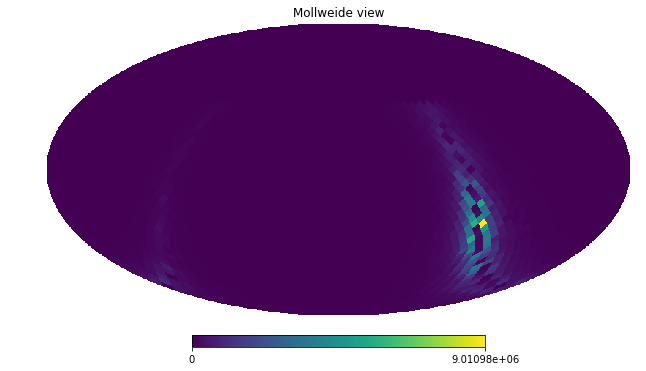

In [81]:
hp.mollview( np.array(starDens ) )

plot histogram of time gaps

In [19]:
dblist_all

['agnddf_v1.5_10yrs.db',
 'alt_dust_v1.5_10yrs.db',
 'alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db',
 'baseline_2snaps_v1.5_10yrs.db',
 'baseline_v1.5_10yrs.db',
 'bulges_bs_v1.5_10yrs.db',
 'bulges_bulge_wfd_v1.5_10yrs.db',
 'bulges_cadence_bs_v1.5_10yrs.db',
 'bulges_cadence_bulge_wfd_v1.5_10yrs.db',
 'bulges_cadence_i_heavy_v1.5_10yrs.db',
 'bulges_i_heavy_v1.5_10yrs.db',
 'daily_ddf_v1.5_10yrs.db',
 'dcr_nham1_ug_v1.5_10yrs.db',
 'dcr_nham1_ugr_v1.5_10yrs.db',
 'dcr_nham1_ugri_v1.5_10yrs.db',
 'dcr_nham2_ug_v1.5_10yrs.db',
 'dcr_nham2_ugr_v1.5_10yrs.db',
 'dcr_nham2_ugri_v1.5_10yrs.db',
 'descddf_v1.5_10yrs.db',
 'filterdist_indx1_v1.5_10yrs.db',
 'filterdist_indx2_v1.5_10yrs.db',
 'filterdist_indx3_v1.5_10yrs.db',
 'filterdist_indx4_v1.5_10yrs.db',
 'filterdist_indx5_v1.5_10yrs.db',
 'filterdist_indx6_v1.5_10yrs.db',
 'filterdist_indx7_v1.5_10yrs.db',
 'filterdist_indx8_v1.5_10yrs.db',
 'footprint_add_mag_cloudsv1.5_10yrs.db',
 'footprint_big_sky_dustv1.5_10yrs.db',
 'footprint_big_s

In [18]:
dblist_all[4:5]

['baseline_v1.5_10yrs.db']

### run for one opsim without proposal info

In [39]:
%%time 

# run for one opsim only

dicFoMtGaps = {}
dicNfields = {}
dicNstar = {}

dicFoM = {}
#dicFoM['db'] = dblist_all[4:5]
dicFoM['db'] = ['footprint_big_wfdv1.5_10yrs.db',]

nside = 16
# select mini survey footprint 
ipix_ms = None
sqlstr = 'night<4000 and note not like "%DD%" '
magdic = {'u':18, 'g':18, 'r':18, 'i':18, 'z':18, 'y':18}

dataRaw = {}  # save the raw metricValues.data for each opsim each fltpair; dataRaw[fltpair][dbname]

for fltpair in fltpairs:     
    dicFoMtGaps[fltpair] = []
    dicNfields[fltpair] = []
    dicNstar[fltpair] = []
    
    dataRaw[fltpair] = {}
    for dbname in dicFoM['db']: 
        if fltpair[0]==fltpair[1]:
            tmin = 5/60/60/24 # in days
            tmax = 3e8/60./60./24    
            # histogram in log space
            bins=np.logspace(np.log10(tmin), np.log10(tmax), 50)
            
        else:
            tmin = 5/60/60/24
            tmax = 1.5/24 # 1.5 hour in days
            bins = np.linspace(tmin, tmax, 50)
            
        metricSky = runMetric(dbname, fltpair=fltpair, sqlstr=sqlstr, nside=nside, ipix_ms=ipix_ms, 
                                 mag_lim=[magdic[fltpair[0]], magdic[fltpair[1]]],
                                 tmin=tmin, tmax=tmax, bins=bins,
                                 filename=None, save_dT=True, dataout=True );
            
        arr = metricSky.metricValues.data 
        
        df = pd.DataFrame.from_records( arr[ arr != None ] )
        
        # count number of fields/stars above threshold 
        df['starDensity'] = starDens[ df['pixId'].values ] 
        idx = df['Nv'] > Nvth[fltpair]
        Nfields = df['Nv'][idx].shape[0]
        Nstar = np.sum( df['starDensity'][idx] )

        FoM_tgaps = get_FoM_tgaps(df=df, tmin=tmin, tmax=tmax, bins=bins)
                
        dicFoMtGaps[fltpair].append (FoM_tgaps)
        dicNfields[fltpair].append(Nfields)
        dicNstar[fltpair].append(Nstar)
        
        dataRaw[fltpair][dbname] = df[['pixId', 'Dkl', 'FoM_i', 'Nv', 'dT_lim']]  
        
        print('>>>', fltpair, dbname, FoM_tgaps, Nfields, Nstar)
    
    df_fom = pd.DataFrame(dicFoMtGaps)
    df_fom.to_csv('df_tgapsFoM_{}.csv'.format(dbname), index=False)
    
    df_fom = pd.DataFrame(dicNfields)
    df_fom.to_csv('df_Nfields_{}.csv'.format(dbname), index=False)
    
    df_fom = pd.DataFrame(dicNstar)
    df_fom.to_csv('df_Nstars_{}.csv'.format(dbname), index=False)
    
    # save raw data to pickle
    pd.DataFrame( dataRaw ).to_pickle(outDir+'/tgaps_dataRaw_{}.pkl'.format(dbname),)

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and night<4000 and note not like "%DD%"  for columns ['fiveSigmaDepth', 'observationStartMJD', 'filter', 'fieldDec', 'fieldRA']
Found 146196 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uu footprint_big_wfdv1.5_10yrs.db 14307.928923071027 57 4547880
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") and night<4000 and note not like "%DD%"  for columns ['fiveSigmaDepth', 'observationStartMJD', 'filter', 'fieldDec', 'fieldRA']
Found 352556 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ug footprint_big_wfdv1.5_10yrs.db 9048.751206724719 232 35469756
Healpix slicer using NSIDE=16, appr

Found 900195 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iy footprint_big_wfdv1.5_10yrs.db 18835.126872703975 467 34380792
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") and night<4000 and note not like "%DD%"  for columns ['fiveSigmaDepth', 'observationStartMJD', 'filter', 'fieldDec', 'fieldRA']
Found 415701 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zz footprint_big_wfdv1.5_10yrs.db 71683.31829812122 0 0
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and night<4000 and note not like "%DD%"  for columns ['fiveSigmaDepth', 'observationStartMJD', 'filter', 'fieldDec', 'fieldRA']
Found 852405 visits
Running:  ['newMetricS

In [43]:
ls *.csv

df_Nfields_footprint_big_wfdv1.5_10yrs.db.csv
df_Nfields_wfd_v1.5.csv
df_Nstars_footprint_big_wfdv1.5_10yrs.db.csv
df_Nstars_wfd_v1.5.csv
df_tgapsFoM_footprint_big_wfdv1.5_10yrs.db.csv
df_tgapsFoM_wfd_v1.5.csv
tgapsFoM_WFD_v1.5.csv
tgaps_FoM_baseline_v1.5_10yrs.db.csv
tgaps_FoM_baseline_v1.5_GP.csv
tgaps_FoM_baseline_v1.5_LMC.csv
tgaps_FoM_baseline_v1.5_SMC.csv


In [44]:
# add footprint_big to dataframe 
for fomstr in ['tgapsFoM', 'Nstars', 'Nfields']:
    df_Nstar_fbig = pd.read_csv('df_{}_footprint_big_wfdv1.5_10yrs.db.csv'.format(fomstr))
    df_Nstar_fbig['db'] = 'footprint_big_wfdv1.5_10yrs.db'
    
    fomcsv = 'df_{}_wfd_v1.5.csv'.format(fomstr)
    df_fom = pd.read_csv(fomcsv)
    df_fom['db'] = dblist_all
    
    idx = int( np.where( df_fom['db']=='footprint_big_wfdv1.5_10yrs.db' )[0] )
    df_fom.loc[idx ] = df_Nstar_fbig.loc[0]
    
    df_fom.to_csv('{}_WFD_v1.5.csv'.format(fomstr), index=False)
    

In [81]:
df_fom.loc[31]

uu                           24106.8
ug                           19359.5
ur                           52384.2
ui                             31642
uz                               NaN
uy                           1754.14
gg                           49977.5
gr                           71343.2
gi                           43684.1
gz                           25322.7
gy                             53788
rr                            165469
ri                            102243
rz                           85194.3
ry                            117094
ii                            142661
iz                           75959.2
iy                            153248
zz                            103447
zy                            126912
yy                            137697
db    footprint_big_wfdv1.5_10yrs.db
Name: 31, dtype: object

In [9]:
%%time 

# run for baseline only

dicFoMtGaps = {}
dicNfields = {}
dicNstar = {}

dicFoM = {}
dicFoM['db'] = dblist_all[4:5]

nside = 16
# select mini survey footprint 
ipix_ms = None
sqlstr = "night<4000 and proposalId=1"
magdic = {'u':18, 'g':18, 'r':18, 'i':18, 'z':18, 'y':18}

dataRaw = {}  # save the raw metricValues.data for each opsim each fltpair; dataRaw[fltpair][dbname]

for fltpair in fltpairs:     
    dicFoMtGaps[fltpair] = []
    dicNfields[fltpair] = []
    dicNstar[fltpair] = []
    
    dataRaw[fltpair] = {}
    for dbname in dicFoM['db']: 
        if fltpair[0]==fltpair[1]:
            tmin = 5/60/60/24 # in days
            tmax = 3e8/60./60./24    
            # histogram in log space
            bins=np.logspace(np.log10(tmin), np.log10(tmax), 50)
            
        else:
            tmin = 5/60/60/24
            tmax = 1.5/24 # 1.5 hour in days
            bins = np.linspace(tmin, tmax, 50)
            
        metricSky = runMetric(dbname, fltpair=fltpair, sqlstr=sqlstr, nside=nside, ipix_ms=ipix_ms, 
                                 mag_lim=[magdic[fltpair[0]], magdic[fltpair[1]]],
                                 tmin=tmin, tmax=tmax, bins=bins,
                                 filename=None, save_dT=True, dataout=True );
            
        arr = metricSky.metricValues.data 
        
        df = pd.DataFrame.from_records( arr[ arr != None ] )
        
        # count number of fields/stars above threshold 
        df['starDensity'] = starDens[ df['pixId'].values ] 
        idx = df['Nv'] > Nvth[fltpair]
        Nfields = df['Nv'][idx].shape[0]
        Nstar = np.sum( df['starDensity'][idx] )

        FoM_tgaps = get_FoM_tgaps(df=df, tmin=tmin, tmax=tmax, bins=bins)
                
        dicFoMtGaps[fltpair].append (FoM_tgaps)
        dicNfields[fltpair].append(Nfields)
        dicNstar[fltpair].append(Nstar)
        
        dataRaw[fltpair][dbname] = df[['pixId', 'Dkl', 'FoM_i', 'Nv', 'dT_lim']]  
        
        print('>>>', fltpair, dbname, FoM_tgaps, Nfields, Nstar)
    
    df_fom = pd.DataFrame(dicFoMtGaps)
    df_fom.to_csv('df_tgapsFoM_{}.csv'.format(dbname), index=False)
    
    df_fom = pd.DataFrame(dicNfields)
    df_fom.to_csv('df_Nfields_{}.csv'.format(dbname), index=False)
    
    df_fom = pd.DataFrame(dicNstar)
    df_fom.to_csv('df_Nstar_{}.csv'.format(dbname), index=False)
    
    # save raw data to pickle
    pd.DataFrame( dataRaw ).to_pickle(outDir+'/tgaps_dataRaw_{}.pkl'.format(dbname),)


NameError: name 'dicFoM' is not defined

In [10]:
outDir

'/home/idies/workspace/Temporary/lixl/scratch/outDir'

In [12]:
dblist_all[4]

'baseline_v1.5_10yrs.db'

In [10]:

#df_baseline = pd.DataFrame( dataRaw )
df_baseline = pd.read_pickle(outDir+'/tgaps_dataRaw_baseline_v1.5_10yrs.db.pkl')
df_baseline

,uu,ug,ur,ui,uz,uy,gg,gr,gi,gz,...,rr,ri,rz,ry,ii,iz,iy,zz,zy,yy
baseline_v1.5_10yrs.db,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv dT_lim 0 1376...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv ...,...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...


In [135]:
dT = np.concatenate( df_baseline['uu']['baseline_v1.5_10yrs.db'] ['dT_lim'].values )


In [138]:
np.concatenate(dT).shape

(2468080,)

In [136]:
dT.shape

(1459,)

In [11]:

tmin = 5/60/60/24 # in days
tmax = 3e8/60./60./24    
# histogram in log space
bins_log=np.logspace(np.log10(tmin), np.log10(tmax), 50)
            
tmin = 5/60/60/24
tmax = 1.5/24 # 1.5 hour in days
bins_lin = np.linspace(tmin, tmax, 50)


In [14]:
# prepare filter_dict
fltpairs = ['uu', 'ug', 'ur', 'ui', 'uz', 'uy', 'gg', 'gr', 'gi', 'gz', 'gy',
           'rr', 'ri', 'rz', 'ry', 'ii', 'iz', 'iy', 'zz', 'zy', 'yy' ]

filter_dict = {}
for fltpair in fltpairs:
    filter_dict[fltpair] = {}
    dT = np.concatenate( df_baseline[fltpair]['baseline_v1.5_10yrs.db'] ['dT_lim'].values )
    filter_dict[fltpair]['dT'] = dT
    
    if fltpair[0]==fltpair[1]:
        bins = bins_log
        values, bins_ = np.histogram(dT, bins=bins);
    else:
        bins = bins_lin
        values, bins_ = np.histogram(dT, bins=bins);

    Dkl = get_Dkl(values)
    
    filter_dict[fltpair]['Dkl'] = Dkl
    print(fltpair, len(dT),  Dkl)

uu 2468080 5.398810362201651
ug 70578 2.1134440233740857
ur 66368 1.375961964396934
ui 9339 0.5016790761842163
uz 0 nan
uy 50 6.081792190269123
gg 5330741 5.312331831053857
gr 127608 1.6617405390844637
gi 24946 1.171693868930305
gz 987 0.43786301783702203
gy 494 0.61516906181712
rr 29186938 5.787795755226195
ri 180466 1.727938366489182
rz 14403 0.9063908925784445
ry 2043 0.40171911859405973
ii 29609453 6.215477775914526
iz 206627 1.8262000625825658
iy 38139 0.7669018018944066
zz 23694537 6.00344538601065
zy 174632 1.3822756018255706
yy 26094240 5.950768567363721


uu 2468080
ug 70578
ur 66368
ui 9339
uz 0
uy 50
gg 5330741
gr 127608
gi 24946
gz 987
gy 494
rr 29186938
ri 180466
rz 14403
ry 2043
ii 29609453
iz 206627
iy 38139
zz 23694537
zy 174632
yy 26094240


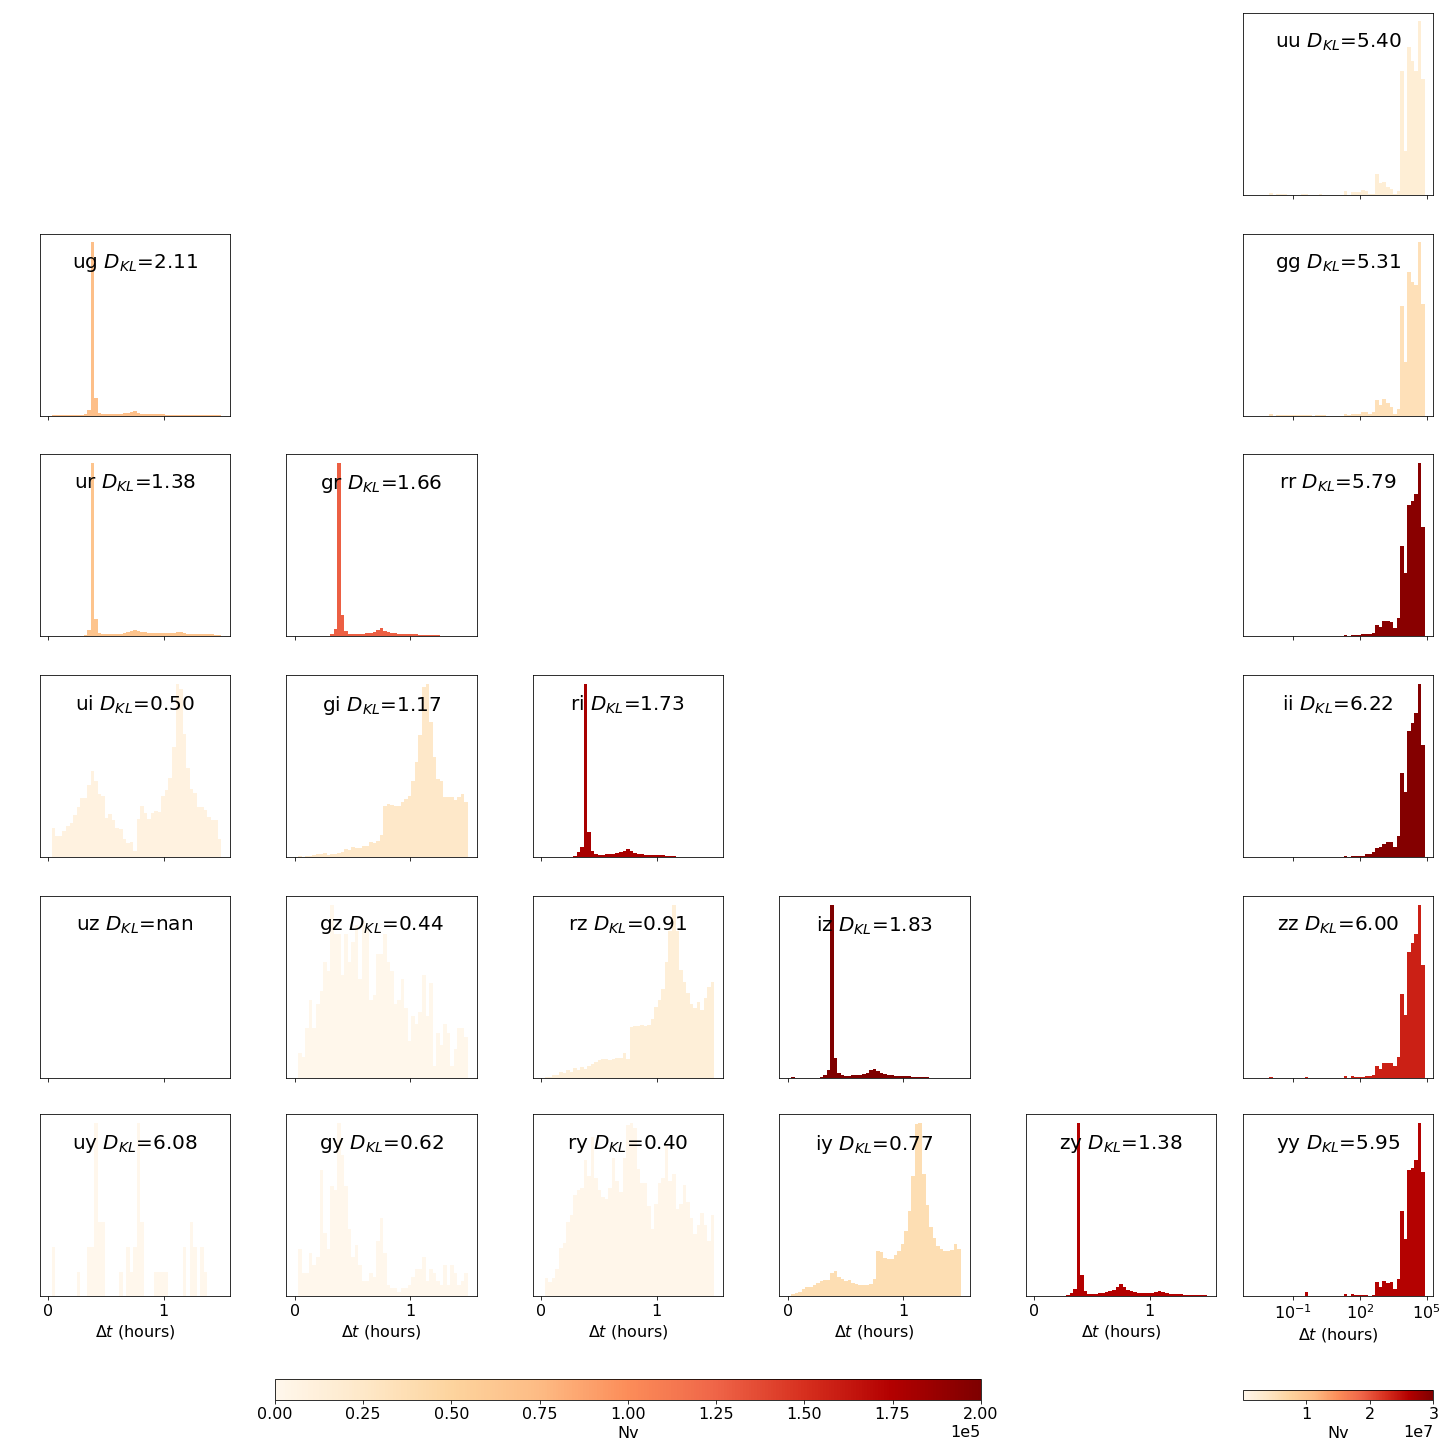

In [17]:

tmin = 5/60/60 # in hour
tmax = 3e8/60./60.   
# histogram in log space
bins_log=np.logspace(np.log10(tmin), np.log10(tmax), 50)
            
tmin = 5/60/60
tmax = 1.5 # 1.5 hour in days
bins_lin = np.linspace(tmin, tmax, 50)


plot_hist_colorbar(filter_dict, figsize=(20, 20), histbins=[bins_log, bins_lin], 
                   cumulative=False, density=False, histtype='stepfilled')


In [28]:
filter_dict['gg']['dT']

array([ 356.00360217, 1109.83084951,  753.82724734, ..., 2187.98940173,
       2544.03327195,  745.98921647])

Text(0, 0.5, 'Nv (M)')

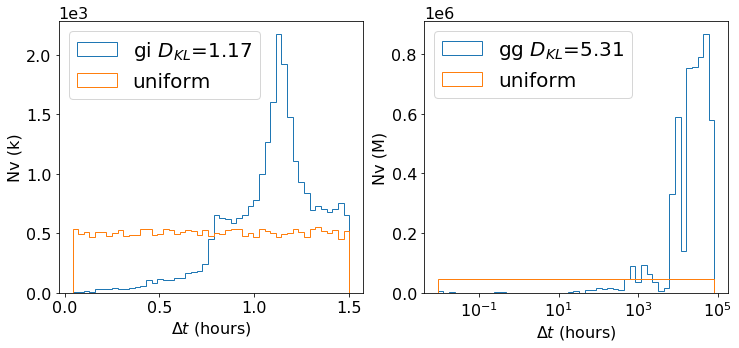

In [16]:
# plot a distribution with uniform one 

key = 'gi'
dT = filter_dict[key]['dT'] * 24
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

dkltex = '$D_{KL}$'
title = '{} {}={:.2f}'.format(key, dkltex, filter_dict[key] ['Dkl'])

uni = np.random.uniform(low=dT.min(), high=dT.max(), size=len(dT) )

bins_lin = np.linspace(dT.min(), dT.max(), 50)

ax = axs[0]
_ = ax.hist(dT, bins=bins_lin, label=title, 
                          cumulative=False, density=False, histtype='step' );
_ = ax.hist(uni, bins=bins_lin, label='uniform', alpha=1,
                          cumulative=False, density=False, histtype='step'  );
ax.legend(loc='upper left')
ax.set_xlabel('$\Delta t$ (hours)')
ax.set_ylabel('Nv (k)')
ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0), )

# --------------------------
key = 'gg'
dT = filter_dict[key]['dT'] * 24

low = np.log(dT.min())
high = np.log(dT.max())
uni = np.power(10, np.random.uniform(low=low, high=high, size=len(dT) ) )

title = '{} {}={:.2f}'.format(key, dkltex, filter_dict[key] ['Dkl'])


tmin = dT.min()
tmax = dT.max()
bins_log=np.logspace(np.log10(tmin), np.log10(tmax), 50)

ax = axs[1]
_ = ax.hist(dT, bins=bins_log, label=title, 
                          cumulative=False, density=False, histtype='step' );

_ = ax.hist(uni, bins=bins_log, label='uniform', alpha=1,
                          cumulative=False, density=False, histtype='step'  );
ax.set_xscale('log')
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), )
ax.legend(loc='upper left')
ax.set_xlabel('$\Delta t$ (hours)')
ax.set_ylabel('Nv (M)')

# fig.suptitle(title)

In [15]:
def plot_hist_colorbar(filter_dict, figsize=(20, 20), histbins=[50, 50], vmax=10000, **kwargs):
    """plot histogram
    Inputs:
        filter_dict: ['uu']['dT']
        
    """
    #fig, axs = plt.subplots(6, 6, figsize=figsize, constrained_layout=True); # 6 axes on a 2x3 grid
    fig, axs = plt.subplots(6, 6, figsize=figsize, constrained_layout=True);
    flt = ['u', 'g', 'r', 'i', 'z', 'y']
    fdict = {'u':0, 'g':1, 'r':2, 'i':3, 'z':4, 'y':5}
    cmap = matplotlib.cm.OrRd
    for i, f0 in enumerate(flt):
        for f1 in flt[i:]:
            key = '{}{}'.format(f0, f1)
            dT = filter_dict[key] ['dT']
            #eDkl = filter_dict[key] ['eDkl']
            
            #title = '{}{} Nv={} $D_k$={:.2f}'.format(f0, f1, len(dT), filter_dict[key] ['Dkl'])                   
            dkltex = '$D_{KL}$'
            title = '{} {}={:.2f}'.format(key, dkltex, filter_dict[key] ['Dkl'])

            if f0==f1:
                vmin1 = 100000
                vmax1 = 30000000
                norm = matplotlib.colors.Normalize(vmin=vmin1, vmax=vmax1)
                m1 = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
                
                ax = axs[fdict[f0], 5]
                axs[fdict[f0], fdict[f1]].axis('off')
                # plot distribution
                Nv = len(dT)
                if Nv!=0:
                    values, bins, _ = ax.hist(dT*24, bins=histbins[0], color=m1.to_rgba(Nv), label=title, **kwargs );
                    ax.legend(loc='upper center', handlelength=0, handletextpad=0, frameon=False)
                ax.set_xscale("log")
                
            else:
                axs[fdict[f0], fdict[f1]].axis('off')
                ax = axs[fdict[f1], fdict[f0]]
                
                vmin2 = 0
                vmax2 = 200000
                norm = matplotlib.colors.Normalize(vmin=vmin2, vmax=vmax2)
                m2 = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

                # plot distribution
                Nv = len(dT)
                #if Nv!=0:
                values, bins, _ = ax.hist(dT*24, bins=histbins[1], color=m2.to_rgba(Nv), label=title, **kwargs );
                ax.legend(loc='upper center', handlelength=0, handletextpad=0, frameon=False)
            
            # ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

            # ax.set_title(title)
            
            if fdict[f1]!=5:
                ax.get_xaxis().set_ticklabels([])
                
            ax.get_yaxis().set_ticks([])
            #ax.set_ylabel('N fields')
            print(key, Nv)
    for i in range(6):
        #axs[i, i].axis('off')
        axs[i, 5].axis('on')    
        axs[5, i].set_xlabel('$\Delta t$ (hours)')
          
    # cbar diagonal
    m1.set_array(np.linspace(vmin1, vmax1) ) 
    cbar1 = fig.colorbar(mappable=m1, ax=axs[:,5], shrink=1, location='bottom')
    cbar1.set_label('Nv')
    #cbar1.formatter.set_powerlimits((0, 0))
    #cbar1.update_ticks()

    # for off diagonal
    m2.set_array(np.linspace(vmin2, vmax2) ) 
    cbar2 = fig.colorbar(mappable=m2, ax=axs[:,:5], shrink=.6, location='bottom')
    cbar2.set_label('Nv')
    cbar2.set_clim([0, vmax2])

    cbar2.formatter.set_powerlimits((0, 0))
    cbar2.update_ticks()
    
    #fig.suptitle(dbfile, fontsize=16)
    #fig.savefig('{}.png'.format(filename), dpi=200)
    #fig.tight_layout( pad=1.0 )



#### utils

In [2]:
# coordinates transform
def pix2radec(nside, ipix, degree=True):
    """from ipix to ra/dec"""
    
    theta, phi = hp.pix2ang(nside, ipix)
    ra = phi
    dec = np.pi/2. - theta
    if degree:
        ra = np.rad2deg(ra)
        dec = np.rad2deg(dec)
    return ra, dec
    